In [9]:
import pandas as pd

In [10]:
df=pd.read_csv("전처리저장용.csv")
import matplotlib as mpl
mpl.rcParams['font.family'] ='AppleGothic'


In [11]:
df_ca=df[df["카테고리"]=="마케팅"]

In [12]:
 count = df_ca[df_ca['코스(상품) 이름'].str.contains('김영하')].shape[0]
 print(count)


1692


In [13]:
# 월별로 '코스(상품) 이름'의 빈도수 계산하여 파일로 저장
for month in range(1, 13):
    # 해당 월에 해당하는 데이터 선택
    df_month = df_ca[df_ca['월'] == month]
    
    # '코스(상품) 이름'의 빈도수 계산
    course_counts = df_month['코스(상품) 이름'].value_counts()
    
    # 데이터프레임으로 변환
    df_course_counts = pd.DataFrame({'코스(상품) 이름': course_counts.index, '빈도수': course_counts.values})
    
    # 월별 파일로 저장
    file_name = f'./noRED/월별_코스별_빈도수_{month}월.csv'
    df_course_counts.to_csv(file_name, index=False)


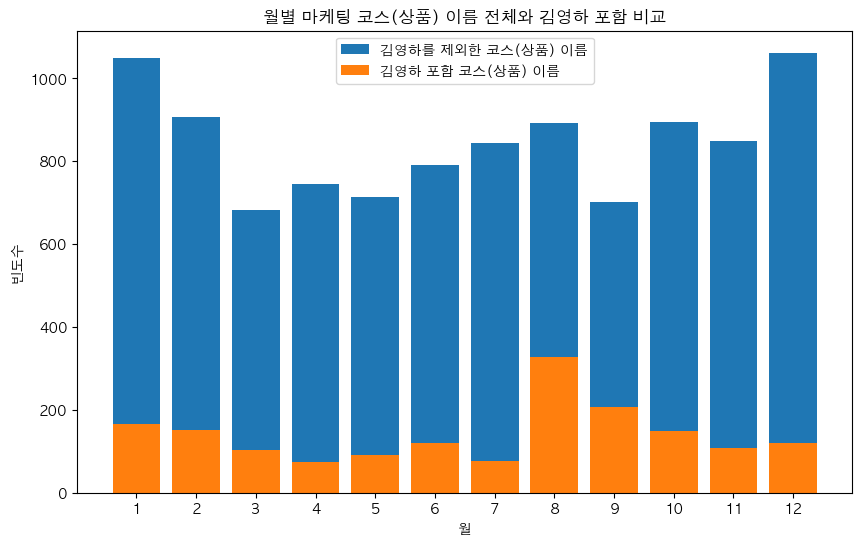

In [14]:
import matplotlib.pyplot as plt

# '마케팅' 카테고리에서 월별로 '코스(상품) 이름' 카운트
month_counts = []
for month in range(1, 13):
    # 해당 월에 해당하는 데이터 선택
    df_month = df_ca[df_ca['월'] == month]
    
    # '코스(상품) 이름' 카운트
    count = df_month.shape[0]
    month_counts.append(count)

# '김영하'가 포함된 '코스(상품) 이름' 카운트
kim_counts = []
for month in range(1, 13):
    # 해당 월에 해당하는 데이터 선택
    df_month = df_ca[df_ca['월'] == month]
    
    # '김영하'가 포함된 '코스(상품) 이름' 카운트
    kim_count = df_month[df_month['코스(상품) 이름'].str.contains('김영하')].shape[0]
    kim_counts.append(kim_count)

# 김영하를 제외한 마케팅 코스(상품) 이름의 빈도수
other_counts = [month_count - kim_count for month_count, kim_count in zip(month_counts, kim_counts)]

# 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(1, 13), other_counts, label='김영하를 제외한 코스(상품) 이름')
plt.bar(range(1, 13), kim_counts, label='김영하 포함 코스(상품) 이름')
plt.xticks(range(1, 13))
plt.xlabel('월')
plt.ylabel('빈도수')
plt.title('월별 마케팅 코스(상품) 이름 전체와 김영하 포함 비교')
plt.legend()
plt.show()
#1월 1135

In [15]:
# '마케팅' 카테고리에서 월별로 코스(상품) 이름의 유니크값의 갯수 출력
for month in range(1, 13):
    # 해당 월에 해당하는 데이터 선택
    df_month = df_ca[df_ca['월'] == month]
    
    # 코스(상품) 이름의 유니크값의 갯수 출력
    unique_count = df_month['코스(상품) 이름'].nunique()
    print(f"{month}월: {unique_count}")


1월: 19
2월: 21
3월: 19
4월: 21
5월: 21
6월: 19
7월: 18
8월: 21
9월: 22
10월: 24
11월: 26
12월: 27


In [18]:
import matplotlib.pyplot as plt

# 네오아카데미 코스
df_neo = df_re[df_re['코스(상품) 이름'].str.contains('네오아카데미')]
count_neo = df_neo['코스(상품) 이름'].value_counts(sort=False)
average_price_neo = df_neo.groupby('코스(상품) 이름')['실거래금액'].mean().round(2)

# 김영하 코스
df_kim = df_re[df_re['코스(상품) 이름'].str.contains('김영하')]
count_kim = df_kim['코스(상품) 이름'].value_counts(sort=False)
average_price_kim = df_kim.groupby('코스(상품) 이름')['실거래금액'].mean().round(2)

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 13))

# 네오아카데미 막대 그래프 - 코스(상품) 이름 빈도수
bar1 = ax1.bar(count_neo.index, count_neo, color='orange', alpha=0.6, label='네오아카데미 빈도')

# 김영하 막대 그래프 - 코스(상품) 이름 빈도수
bar2 = ax1.bar(count_kim.index, count_kim, color='red', alpha=0.6, label='김영하 빈도')

# 오른쪽 y축 설정
ax2 = ax1.twinx()

# 네오아카데미 꺾은선 그래프 - 각 유니크한 값의 평균 실거래금액
line1 = ax2.plot(range(len(average_price_neo)), average_price_neo.values, color='blue', marker='o', label='네오아카데미 평균 실거래금액')

# 김영하 꺾은선 그래프 - 각 유니크한 값의 평균 실거래금액
line2 = ax2.plot(range(len(average_price_kim)), average_price_kim.values, color='green', marker='o', label='김영하 평균 실거래금액')

# 축과 레이블 설정
ax1.set_ylabel('코스(상품) 이름 빈도수')
ax2.set_ylabel('평균 실거래금액')
ax1.set_xlabel('코스(상품) 이름')
ax1.set_title('네오아카데미와 김영하 코스(상품) 이름 빈도수와 평균 실거래금액')

# 범례 표시
lines = line1 + line2 + [bar1, bar2]
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc='best')

# x축 글씨 세로로 표시
ax1.set_xticklabels(count_neo.index.union(count_kim.index), rotation='vertical')

# x축 틱 위치 설정
plt.xticks(range(len(count_neo) + len(count_kim)))

# 레이블이 그래프와 겹치지 않도록 자동 조정
plt.tight_layout() 

plt.show()



NameError: name 'df_re' is not defined